In [1285]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfinv

In [1741]:
gauss = lambda x, p, sigma: 1./np.sqrt(2*np.pi)/sigma*np.exp(-(x-p)**2/2/sigma**2)
cdf   = lambda x, u, bw: .5 * (1+erf((x-u)/np.sqrt(2)/bw))

derfinv = lambda x: 0.5*np.sqrt(np.pi)*np.exp((erfinv(x))**2)
aerfinv = lambda x: np.sqrt(np.pi)*(.5*x + 1./24.*np.pi*x**3)
aderfinv = lambda x: np.sqrt(np.pi)*(.5 + 3./24.*np.pi*x**2)

def mu(x,u0,u1,d,p):
    s1 = 2*d*x/p + u1-d
    s0 = 2*d*(x-1)/(1-p) + u0+d
    return s1*(x<p) + s0*(x>p)

def dmu(x,u0,u1,d,p):
    ds1 = -2*d*x/p**2
    ds0 = 2*d*(x-1)/(1-p)**2
    return ds1*(x<p) + ds0*(x>p)

def mg(x,u0,u1,d,p):
    s1 = aerfinv((2*x)/p-1)       * np.sqrt(2)*d + u1
    s0 = aerfinv(2*(x-1)/(1-p)+1) * np.sqrt(2)*d + u0
    return s1*(x<p) + s0*(x>p)

def dmg(x,u0,u1,d,p):
    ds1 = aderfinv((2*x)/p-1)       * np.sqrt(2)*d * -2*x/p**2
    ds0 = aderfinv(2*(x-1)/(1-p)+1) * np.sqrt(2)*d * 2*(x-1)/(1-p)**2
    return ds1*(x<p) + ds0*(x>p)

def msg(x,u0,u1,d,p):
    s1 = aerfinv((2*x)/p-1)       * np.sqrt(2)*d + u1
    s0 = aerfinv(2*(x-1)/(1-p)+1) * np.sqrt(2)*d + u0
    return (s1*(x<p)+(x>p))*(p>=.5) + s0*(x>p)*(p<.5)

def dmsg(x,u0,u1,d,p):
    ds1 = aderfinv((2*x)/p-1)       * np.sqrt(2)*d * -2*x/p**2
    ds0 = aderfinv(2*(x-1)/(1-p)+1) * np.sqrt(2)*d * 2*(x-1)/(1-p)**2
    return ds1*(x<p)*(p>=.5) + ds0*(x>p)*(p<.5)

In [1787]:
def estimator(k,bw,b,est,dest,fn=None):
    u = np.random.uniform(0,1,100000)
    p = np.reshape(np.linspace(.01,.99,99),[-1,1])
#--------------------------------------------------------------------------------
    s = est(u,p+k*bw,p-k*bw,b,p)
    d0 = cdf(p-u,0,bw)
    d1 = cdf(p-s,0,bw)

    fig,ax = plt.subplots(2,2,figsize=(16,10))
    for i in range(2):
        if i==0:
            f0,f1 = d0>.5, d1>.5
            ax[0][i].set_ylabel('$|\Phi\in \{1\}| / N$')
        else:
            f0,f1 = [(1-z)*(z>.5)+z*(z<.5) for z in [d0,d1]]            
            ax[0][1].set_ylabel('|$H-\Phi|$')
        f0,f1 = [np.mean(z,1) for z in [f0,f1]]    
        ax[0][i].plot(p,f0,c='.6')
        ax[0][i].plot(p,f1,c='0')
        ax[0][i].set_xlabel('$\\theta$')
        ax[0][i].legend(['$\Phi((\\theta-u)/\sigma)$', '$\Phi((\\theta-F^{-1}(u;\\theta))/\sigma)$'],loc=(0.01,0.81))
#--------------------------------------------------------------------------------
    g0 = gauss(p-u,0,bw) / bw
    g1 = gauss(p-s,0,bw) / bw * (1-dest(u,p+k*bw,p-k*bw,b,p))

    for i in range(2):
        if i==0:
            f0,f1 = [np.mean(z,1) for z in [g0,g1]]
            ax[1][i].set_ylabel('$mean(d\Phi/d\\theta)$')
        else:
            f0,f1 = [np.std(z,1)**2 for z in [g0,g1]]
            ax[1][i].set_ylabel('$variance(d\Phi/d\\theta)$')            
        ax[1][i].plot(p,f0,c='.6')
        ax[1][i].plot(p,f1,c='.0')
        ax[1][i].set_xlabel('$\\theta$')
        ax[1][i].legend(['$\Phi((\\theta-u)/\sigma)$', '$\Phi((\\theta-F^{-1}(u;\\theta))/\sigma)$'],loc=(0.01,0.81))
#--------------------------------------------------------------------------------
    if fn is not None:
        plt.savefig(fn)
    plt.show()

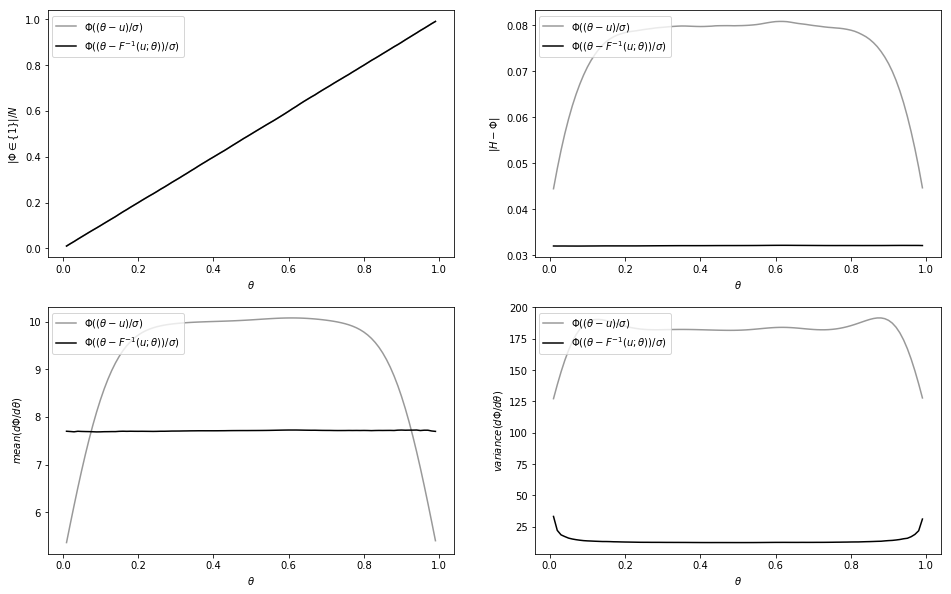

In [1788]:
estimator(1.9, .1, .04, mu, dmu)

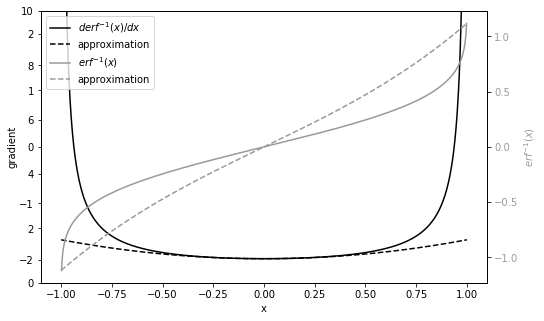

In [1641]:
plt.subplots(figsize=(8,5))
x = np.linspace(-1,1,1000)
q = 1.
lns3 = plt.plot(x,derfinv(x/q),c='0',label='$derf^{-1}(x)/dx$')
lns1 = plt.plot(x,dap_erfinv(x/q),c='0',ls='--',label='approximation')
plt.ylim(0,10)
plt.ylabel('gradient')
plt.xlabel('x')

lns2 = plt.twinx().plot(x,erfinv(x/q),c='.6',label='$erf^{-1}(x)$')
lns4 = plt.twinx().plot(x,ap_erfinv(x/q),c='.6',ls='--',label='approximation')
plt.yticks(color='.6')
lns = lns3+lns1+lns2+lns4
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)
plt.ylabel('$erf^{-1}(x)$',color='.6')
#plt.savefig('32')
plt.show()

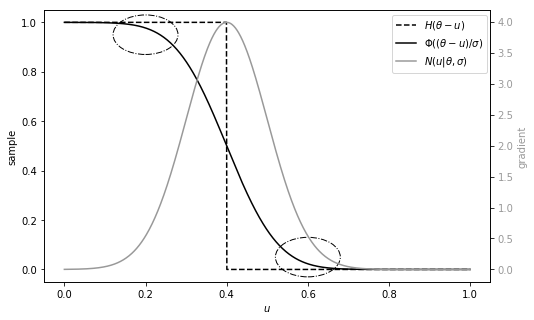

In [389]:
x = np.linspace(0,1,1000)
p=.4
bw = .1
pp = .05
#--------------------------------------------------------------------------------
plt.subplots(figsize=(8,5))
lns3 = plt.plot(x,np.heaviside(p-x,1), '--', c='.0',label = '$H(\\theta-u)$')
lns1 = plt.plot(x,cdf(p-x,0,bw), c='0',label='$\Phi((\\theta-u)/\sigma)$')
plt.ylabel('sample')
plt.xlabel('$u$')
plt.gcf().gca().add_artist(plt.Circle((.2, .95), 0.08, ls='-.', color='k', fill=False))
plt.gcf().gca().add_artist(plt.Circle((.6, .05), 0.08, ls='-.',color='k', fill=False))

lns2 = plt.twinx().plot(x,gauss(x,p,bw), c='0.6',label='$N(u|\\theta,\sigma)$')
plt.ylabel('gradient',color='.6')
plt.yticks(color='.6')
lns = lns3+lns1+lns2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs,loc=(.78,.77))
#plt.savefig('31')
plt.show()

In [118]:
gb1e3 = np.load('thesis_data/gb_1e3.npy')
gb3e4 = np.load('thesis_data/gb_3e4.npy')
sm1e3p05 = np.load('thesis_data/sm_1e3_p05.npy')
sm1e3p1 = np.load('thesis_data/sm_1e3_p1.npy')
sm1e3p2 = np.load('thesis_data/sm_1e3_p2.npy')
sm3e4p05 = np.load('thesis_data/sm_3e4_p05.npy')
sm3e4p1 = np.load('thesis_data/sm_3e4_p1.npy')
sm3e4p2 = np.load('thesis_data/sm_3e4_p2.npy')

In [143]:
def plot_data(errs, label, i, ax=None):
    ax = ax or plt
    if i==0:
        m = np.mean(errs[0], axis=0)
        line, = ax.plot(np.arange(1, len(m)+1), m, label=label, linewidth=3)
        m = np.mean(errs[1], axis=0)
        line, = ax.plot(np.arange(1, len(m)+1), m, label=label, linewidth=3, c=line.get_color(), ls='--')
    else:
        m = np.mean(errs[3][0], axis=0)
        line, = ax.plot(np.arange(1, len(m)+1), m, label=label, linewidth=3)

def plot_legend(ax, *a, **kw):
    leg = ax.legend(*a, **kw)
    return leg

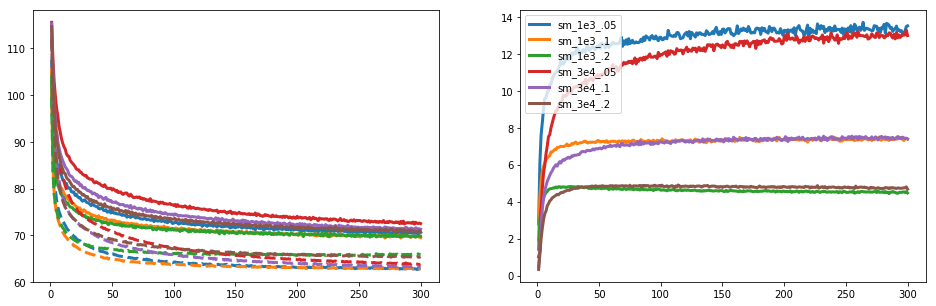

In [146]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

for i in range(2):
    plot_data(sm1e3p05, 'sm_1e3_.05',i, ax[i])
    plot_data(sm1e3p1,  'sm_1e3_.1',i, ax[i])
    plot_data(sm1e3p2,  'sm_1e3_.2',i, ax[i])
    plot_data(sm3e4p05, 'sm_3e4_.05',i, ax[i])
    plot_data(sm3e4p1,  'sm_3e4_.1',i, ax[i])
    plot_data(sm3e4p2,  'sm_3e4_.2',i, ax[i])
    
plot_legend(ax[1])
plt.show()

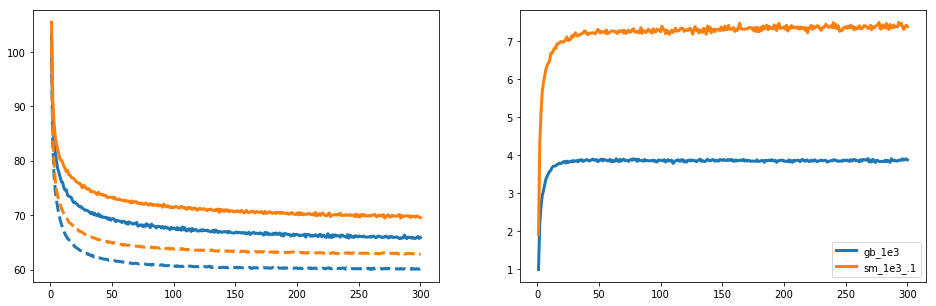

In [153]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
for i in xrange(2):
    plot_data(gb1e3, 'gb_1e3', i, ax[i])
#    plot_data(gb3e4, 'gb_3e4', i, ax[i])
    plot_data(sm1e3p1,  'sm_1e3_.1',i, ax[i])
    
plot_legend(ax[1])
plt.show()

In [ ]:
batch_xs = ngd_svrg[2]
batch_ys = ngd_svrg[3]
prdt = ngd_svrg[4]
bs = 1

fig, ax = plt.subplots(1,2, figsize=(16,8))
up = np.concatenate([j for j in [np.reshape(i,[7,14]) for i in batch_xs]], 1)
dw = np.concatenate([j for j in [np.reshape(i,[7,14]) for i in batch_ys]], 1)
p1 = np.concatenate(np.split(np.concatenate([up,dw], 0), 1, 1), 0)
#dwy = np.concatenate([j for j in [np.reshape(i,[14,28]) for i in prdt]], 1)
#p2 = np.concatenate(np.split(np.concatenate([up,dwy], 0), bs, 1), 0)
ax[0].imshow(p1, cmap=plt.cm.gray, interpolation='none')
#ax[1].imshow(p2, cmap=plt.cm.gray, interpolation='none')
ax[0].grid(False)
#ax[1].grid(False)
plt.show()